In [1]:
#allow output from every line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib notebook

import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from urllib.request import urlopen
from bs4 import BeautifulSoup

pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [2]:
ids = pd.read_csv("nba_player_ids.csv")
player_list = ids["Player"]
player_stats = ['PTS','TRB','AST','STL','ORB','3P','FT','DRB']

In [3]:
# Player Name Dropdown

from tkinter import *
root = Tk()
root.title("Dropdown")

var = StringVar(root)
var.set("James Harden")

def grab_and_assign(event):
    chosen_option = var.get()
    label_chosen_variable= Label(root, text=chosen_option)
    label_chosen_variable.grid(row=1, column=2)
    print(chosen_option)

drop_menu = OptionMenu(root, var, *player_list, command=grab_and_assign)
drop_menu.grid(row=0, column=0)

label_left=Label(root, text="Selected Player: ")
label_left.grid(row=1, column=0)


root.mainloop()

selected_player = var.get()

''

Aron Baynes


In [4]:
# Player Statistic Dropdown

from tkinter import *
root = Tk()
root.title("Dropdown")

var = StringVar(root)
var.set("PTS")

def grab_and_assign(event):
    chosen_stat = var.get()
    label_chosen_variable= Label(root, text=chosen_stat)
    label_chosen_variable.grid(row=1, column=2)
    print(chosen_stat)


drop_menu = OptionMenu(root, var, *player_stats, command=grab_and_assign)
drop_menu.grid(row=0, column=0)

label_left=Label(root, text="Selected Statistic: ")
label_left.grid(row=1, column=0)


root.mainloop()

selected_stat = var.get()

''

TRB


In [5]:
# Input Amount of Games
games = input("Enter the amount of past games you want to see: ")
games = int(games)

Enter the amount of past games you want to see: 8


In [6]:
# Find ID
id_row = ids.loc[(ids['Player'] == selected_player)]
player_id = id_row['ID'].to_list()
player_id = player_id[0]

In [7]:
player_id
selected_stat
games

'baynear01'

'TRB'

8

In [8]:
# Define All Functions
def scrape_player(player_id, games):
    first_letter = player_id[0]
    url = "https://www.basketball-reference.com/players/" + first_letter + "/" + player_id + "/gamelog/2020"
    print(url)
    html = urlopen(url)
    bs = BeautifulSoup(html.read(), 'lxml')
    tables = bs.find_all('table',{"class":"row_summable"})
    logs_tables = pd.read_html(str(tables))
    logs = logs_tables[0]
    logs = logs[logs['G'].notna()]
    logs = logs[logs['G'] != 'G']
    logs = logs[-games:]
    return(logs)

game_log = scrape_player(player_id, games)

game_log




https://www.basketball-reference.com/players/b/baynear01/gamelog/2020


,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
58,57,35,2020-02-22,33-075,PHO,@,CHI,W (+8),0,12:38,2,3,.667,0,1,.000,0,0,NaN,0,0,0,0,1,0,1,4,4,1.1,-13
59,58,36,2020-02-24,33-077,PHO,@,UTA,W (+20),0,16:21,4,10,.400,1,2,.500,0,0,NaN,6,2,8,1,0,0,0,2,9,8.3,+1
60,59,37,2020-02-26,33-079,PHO,NaN,LAC,L (-10),0,11:43,2,6,.333,0,2,.000,0,0,NaN,0,5,5,0,0,0,0,1,4,1.7,+1
61,60,38,2020-02-28,33-081,PHO,NaN,DET,L (-2),0,12:35,2,4,.500,0,2,.000,3,4,.750,0,4,4,0,0,0,1,1,7,4.4,-7
63,61,39,2020-02-29,33-082,PHO,NaN,GSW,L (-16),0,10:42,2,4,.500,1,1,1.000,1,1,1.000,2,2,4,0,0,0,2,3,6,2.8,+2
65,63,40,2020-03-06,33-088,PHO,NaN,POR,W (+10),1,36:19,12,23,.522,9,14,.643,4,4,1.000,6,10,16,1,1,2,2,4,37,32.4,+17
66,64,41,2020-03-08,33-090,PHO,NaN,MIL,W (+9),1,33:26,8,16,.500,4,11,.364,4,5,.800,2,5,7,1,0,1,2,4,24,16.3,+13
67,65,42,2020-03-10,33-092,PHO,@,POR,L (-16),1,33:50,3,14,.214,1,7,.143,0,0,NaN,1,1,2,1,1,0,2,2,7,-1.7,-15


In [9]:
# Stat Specific
if selected_stat=='PTS':
    points = game_log["PTS"]
    points = np.array(points, dtype=int)
    average_of_stat= np.mean(points)
    two_decimal_places = "{:.2f}".format(average_of_stat)
    print(selected_player, "has been averaging:", two_decimal_places, "points per game in his last", games, "games.")
    v_x_lab = "Points Scored"
    v_y_lab = "Frequency"
    v_title = "Violin Plot of Points Scored"
    d_title = "Distribution Plot of Points Scored"
    x = "Game #"
    t_y_lab = "Points"
    t_title = "Trend of Points Scored per Game"
    

elif selected_stat=='ORB':
    points = game_log["ORB"]
    points = np.array(points, dtype=int)
    average_of_stat= np.mean(points)
    two_decimal_places = "{:.2f}".format(average_of_stat)
    print(selected_player, "has been averaging:", two_decimal_places, "offensive rebounds per game in his last", games, "games.")
    v_x_lab = "Offensive Rebounds"
    v_y_lab = "Frequency"
    v_title = "Violin Plot of Offensive Rebounds"
    d_title = "Distribution Plot of Offensive Rebounds"
    x = "Game #"
    t_y_lab = "Offensive Rebounds"
    t_title = "Trend of Offensive Rebounds per Game"
    
    
elif selected_stat=='TRB':
    points = game_log["TRB"]
    points = np.array(points, dtype=int)
    average_of_stat= np.mean(points)
    two_decimal_places = "{:.2f}".format(average_of_stat)
    print(selected_player, "has been averaging:", two_decimal_places, "total rebounds per game in his last", games, "games.")
    v_x_lab = "Rebounds"
    v_y_lab = "Frequency"
    v_title = "Violin Plot of Rebounds"
    d_title = "Distribution Plot of Rebounds"
    x = "Game #"
    t_y_lab = "Rebounds"
    t_title = "Trend of Rebounds per Game"
    
    
elif selected_stat=='DRB':
    points = game_log["DRB"]
    points = np.array(points, dtype=int)
    average_of_stat= np.mean(points)
    two_decimal_places = "{:.2f}".format(average_of_stat)
    print(selected_player, "has been averaging:", two_decimal_places, "defensive rebounds per game in his last", games, "games.")
    v_x_lab = "Defensive Rebounds"
    v_y_lab = "Frequency"
    v_title = "Violin Plot of Defensive Rebounds"
    d_title = "Distribution Plot of Defensive Rebounds"
    x = "Game #"
    t_y_lab = "Defensive Rebounds"
    t_title = "Trend of Defensive Rebounds per Game"
    

elif selected_stat=='STL':
    points = game_log["STL"]
    points = np.array(points, dtype=int)
    average_of_stat= np.mean(points)
    two_decimal_places = "{:.2f}".format(average_of_stat)
    print(selected_player, "has been averaging:", two_decimal_places, "steals per game in his last", games, "games.")
    v_x_lab = "Steals"
    v_y_lab = "Frequency"
    v_title = "Violin Plot of Steals"
    d_title = "Distribution Plot of Steals"
    x = "Game #"
    t_y_lab = "Steals"
    t_title = "Trend of Steals per Game"

    
elif selected_stat=='AST':
    points = game_log["AST"]
    points = np.array(points, dtype=int)
    average_of_stat= np.mean(points)
    two_decimal_places = "{:.2f}".format(average_of_stat)
    print(selected_player, "has been averaging:", two_decimal_places, "assists per game in his last", games, "games.")
    v_x_lab = "Assists"
    v_y_lab = "Frequency"
    v_title = "Violin Plot of Assists"
    d_title = "Distribution Plot of Assists"
    x = "Game #"
    t_y_lab = "Assists"
    t_title = "Trend of Assists per Game"
    
    
elif selected_stat=='FT':
    points = game_log["FT"]
    points = np.array(points, dtype=int)
    average_of_stat= np.mean(points)
    two_decimal_places = "{:.2f}".format(average_of_stat)
    print(selected_player, "has been averaging:", two_decimal_places, "free throws made per game in his last", games, "games.")
    v_x_lab = "Free Throws Made"
    v_y_lab = "Frequency"
    v_title = "Violin Plot of Free Throws Made"
    d_title = "Distribution Plot of Free Throws Made"
    x = "Game #"
    t_y_lab = "Free Throws Made"
    t_title = "Trend of Free Throws Made per Game"
    
    
elif selected_stat=='3P':
    points = game_log["3P"]
    points = np.array(points, dtype=int)
    average_of_stat= np.mean(points)
    two_decimal_places = "{:.2f}".format(average_of_stat)
    print(selected_player, "has been averaging:", two_decimal_places, "three-pointers made per game in his last", games, "games.")
    v_x_lab = "Three-pointers Made"
    v_y_lab = "Frequency"
    v_title = "Violin Plot of Three-pointers Made"
    d_title = "Distribution Plot of Three-pointers Made"
    x = "Game #"
    t_y_lab = "Three-pointers Made"
    t_title = "Trend of Three-pointers Made per Game"
       
points

Aron Baynes has been averaging: 5.75 total rebounds per game in his last 8 games.


array([ 0,  8,  5,  4,  4, 16,  7,  2])

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Rebounds'),
 Text(0.5, 1.0, 'Violin Plot of Rebounds')]

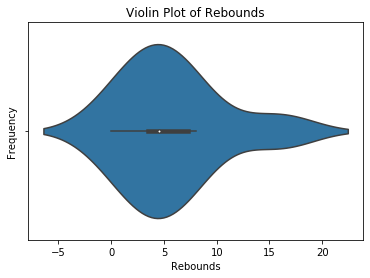

In [10]:
# Visualizations
violin=sns.violinplot(x=points)
violin.set(xlabel=v_x_lab,ylabel=v_y_lab,title=v_title)
violin

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Rebounds'),
 Text(0.5, 1.0, 'Distribution Plot of Rebounds')]

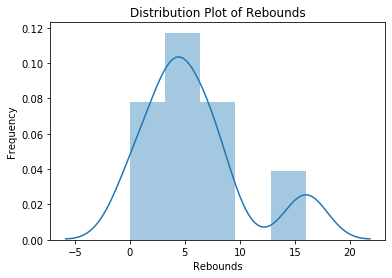

In [11]:
# Dist Plot
dist=sns.distplot(points)
dist.set(xlabel=v_x_lab,ylabel=v_y_lab,title=d_title)
dist

[Text(0, 0.5, 'Rebounds'),
 Text(0.5, 0, 'Game #'),
 Text(0.5, 1.0, 'Trend of Rebounds per Game')]

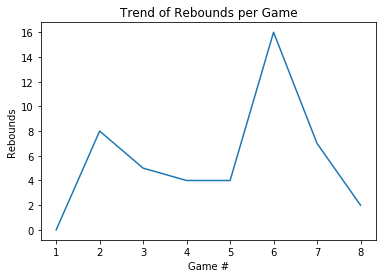

In [12]:
# Trend Plot
game_id = []
for i in range(1,games+1):
    game_id.append(i)

line_plot=sns.lineplot(x=game_id,y=points)
line_plot.set(xlabel=x,ylabel=t_y_lab,title=t_title)
line_plot